In [1]:
import gc
gc.collect()

43

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import pandas as pd

In [3]:
# Load datasets

APPL_DATA_CSV_PATH = 'data/appl_data.csv'
appl_df = pd.read_csv( APPL_DATA_CSV_PATH, header=0 )

BEHAV_ON_SITE_CSV_PATH = 'data/behav_on_site.csv'
behav_df = pd.read_csv( BEHAV_ON_SITE_CSV_PATH, header=0 )

IS_DEFAULT_CSV_PATH = 'data/is_default.csv'
isdef_df = pd.read_csv( IS_DEFAULT_CSV_PATH, header=0 )

In [4]:
# Overview datasets

def overview_df( df ):
    display( 'shape', df.shape )
    display( df.sample(1) )
    
    display( 'isnull', df.isnull().sum() )
    display( 'duplicated', df.duplicated().sum() )
    
    df.info()

In [5]:
# overview_df( appl_df )

# overview_df( behav_df )

# overview_df( isdef_df )

In [6]:
# Add information about default status to applications dataset
clients_df = pd.merge(
    left=appl_df, right=isdef_df,
    how='left',
    on=['appl_id']
)

# Add information about default status to behaviour dataset
behav_default_df = pd.merge(
    left=behav_df, right=clients_df[ ['client_id', 'df'] ],
    how='left',
    on=['client_id']
)

In [7]:
# overview_df( clients_df )

# overview_df( behav_default_df )

In [8]:
def _display_cat_counts_freq( df, col_name, ax, \
                            add_title=''):
    data_to_plot = df[col_name].value_counts()
    ax.bar(
        data_to_plot.index, data_to_plot.values,
        log=True
    )
    col_name_ncount = df[col_name].index.size
    for patch in ax.patches:
        x = patch.get_x()
        y = patch.get_height()
        y_pct = y * 100.0 / col_name_ncount
        ax.annotate(
            ' {0} | {1:.2f}%'.format( y, y_pct ),
            (x+0.5, y),
            ha='center', va='bottom',
            rotation=90
        )
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    ax.set_xticks( data_to_plot.index )
    ax.set_title( '{0} frequency Plot {1}'.format(col_name, add_title) )
    ax.set_xlabel( '{0} classes'.format(col_name) )
    ax.set_ylabel( 'count (log scale)' )


def _display_cat_badclients_rate( df, col_name, ax, \
                                default_col_name='df', bad_client_lbl='bad'):
    bad_clients_df = df[ df[default_col_name] == bad_client_lbl ]
    all_clients_counts = df[col_name].value_counts()
    bad_clients_counts = bad_clients_df[col_name].value_counts()
    
    bad_clients_fail_rate = bad_clients_counts * 100.0 / all_clients_counts
    bad_clients_fail_rate = bad_clients_fail_rate.fillna( 0 )
    data_to_plot = bad_clients_fail_rate.sort_values(ascending=False)
    
    ax.bar( data_to_plot.index, data_to_plot.values )
    
    for patch in ax.patches:
        x = patch.get_x()
        y_pct = patch.get_height()
        ax.annotate(
            ' {0:.2f}%'.format( y_pct ),
            (x+0.5, y_pct),
            ha='center', va='bottom',
            rotation=90
        )
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    ax.set_xticks( data_to_plot.index )
    ax.set_title( '{0} Bad Clients Rate plot'.format(col_name) )
    ax.set_xlabel( '{0} classes'.format(col_name) )
    ax.set_ylabel( 'pct [%]' )


def overview_cat_feature_freq( df, col_name, default_col_name='df' ):
    fig, [ax_0, ax_1, ax_2, ax_3] = plt.subplots( 1, 4, figsize=(25, 5) )
    
    # Display distribution for whole df
    _display_cat_counts_freq( df, col_name, ax=ax_0, add_title='(all)' )
    # Display distribution for training set
    train_df = df[ df[default_col_name].notnull() ]
    _display_cat_counts_freq( train_df, col_name, ax=ax_1, add_title='(train)' )
    # Display distribution for test set
    test_df = df[ df[default_col_name].isnull() ]
    _display_cat_counts_freq( test_df, col_name, ax=ax_2, add_title='(test)' )
    # Display bad clients rate by each category
    _display_cat_badclients_rate( train_df, col_name, ax=ax_3 )
    
    plt.autoscale()
    plt.show()

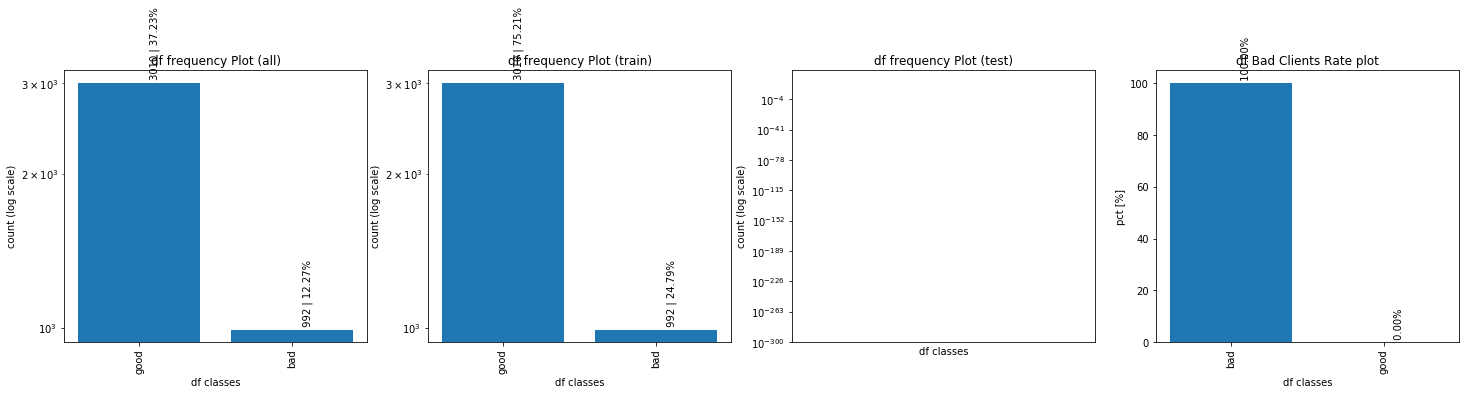

In [9]:
# Overview target data
# unbalanced data -> up/down sampling OR proper cross-validation

overview_cat_feature_freq( isdef_df, 'df' )

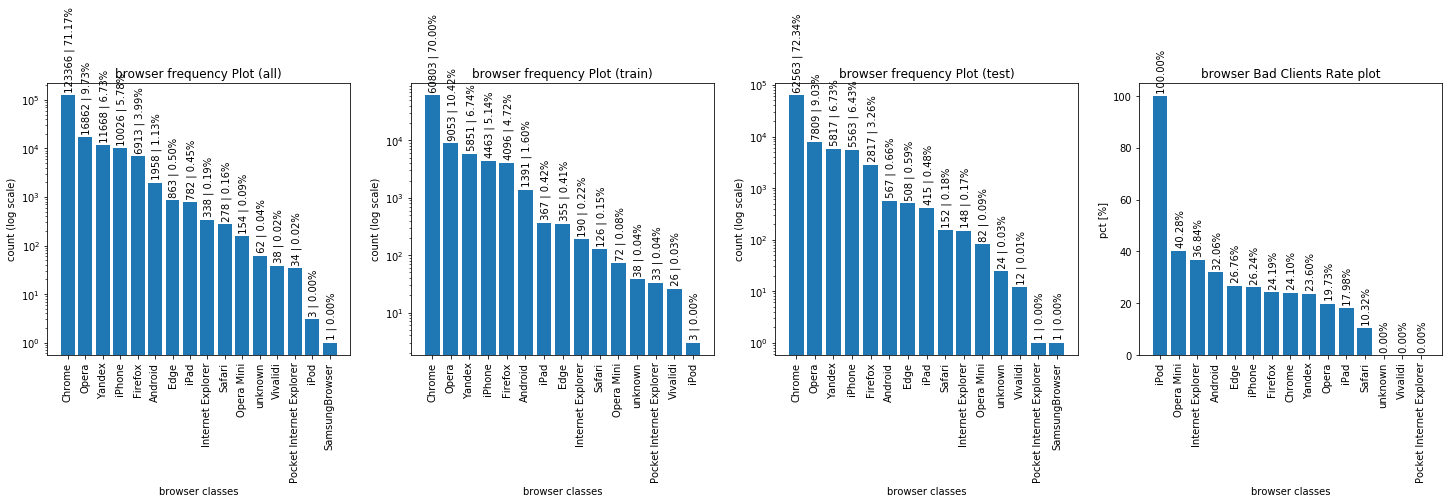

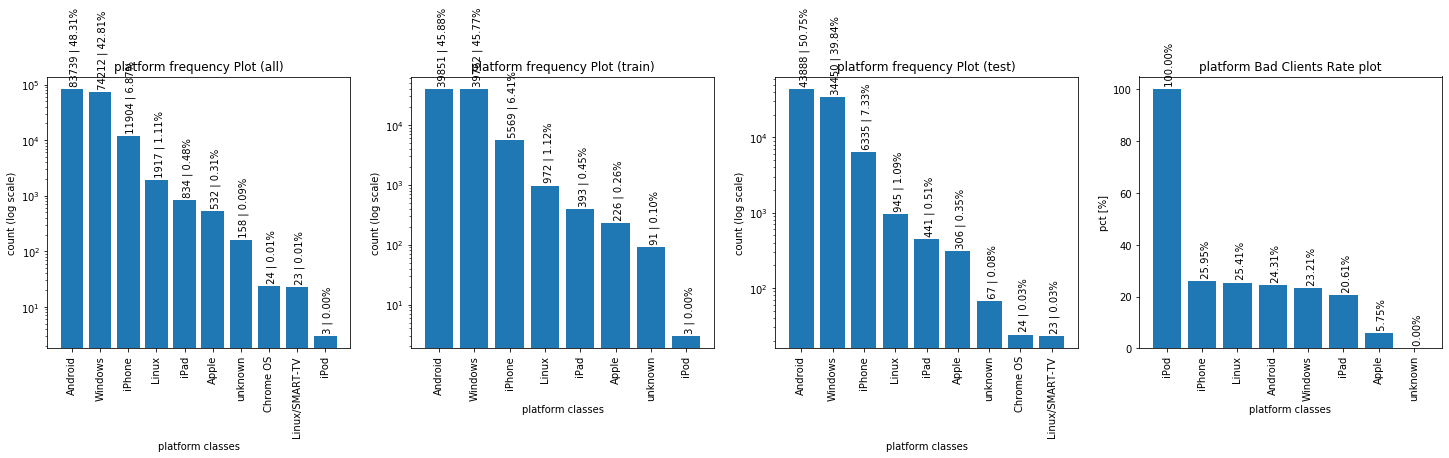

In [10]:
# Overview behavioral data

# Category features

# 'browser'
# Rate of data by category in train and test sets are almost the same
# Train set is missing several categories which are present in test set
# Leave only top categories: opera, ie, android, edge, apple, firefox, chrome, yandex, safari
# Create 'other' category
# Combine iPhone, iPad, iPod users to 'Apple' category (excluding 'safari')
overview_cat_feature_freq( behav_default_df, 'browser' )

# 'platform'
# Rate of data by category in train and test sets are almost the same
# Train set is missing several categories which are present in test set
# Create 'other' category: unknown, chromeos, smarttv, ipod
# Combine 'ipod, iphone, ipad' into single category
overview_cat_feature_freq( behav_default_df, 'platform' )

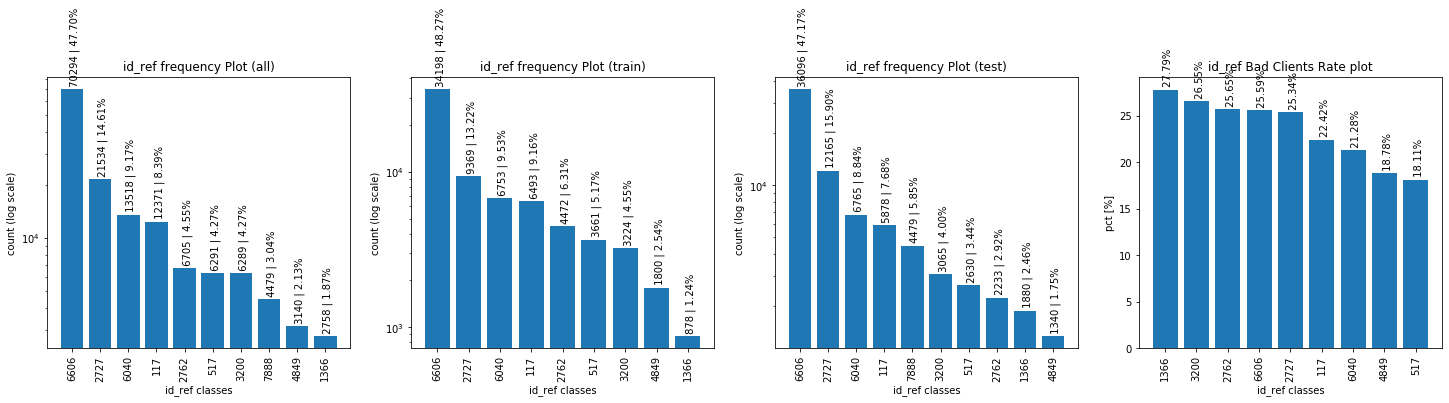

In [11]:
# Page visits (by page)

behav_default_df['id_ref'] = behav_default_df['id_ref'].astype(str)
top10_pages = behav_default_df['id_ref'].value_counts()[:10].index.values
overview_cat_feature_freq(
    behav_default_df[ behav_default_df['id_ref'].isin(top10_pages) ],
    'id_ref'
)

# 'id_ref'
# There might be pages with high and low risks: with bad clients rate >50%, 30-50%, 20-30%, <20%

'unique clients: 8084'

'skew: 5.6089487740511235; kurtosis: 47.09412413153588'

'all clients:'

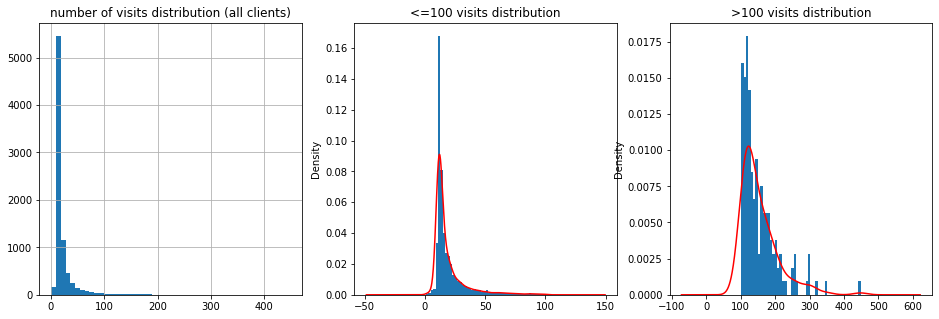

'unique bad clients: 992'

'skew: 4.899091543531757; kurtosis: 33.95375196707685'

,count,mean,std,min,25%,50%,75%,max
id_ref,992.0,20.870968,21.037075,1.0,12.0,14.0,21.25,248.0


'bad clients:'

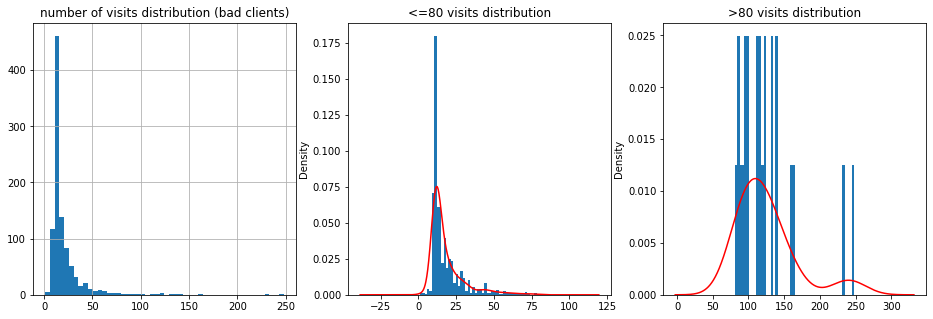

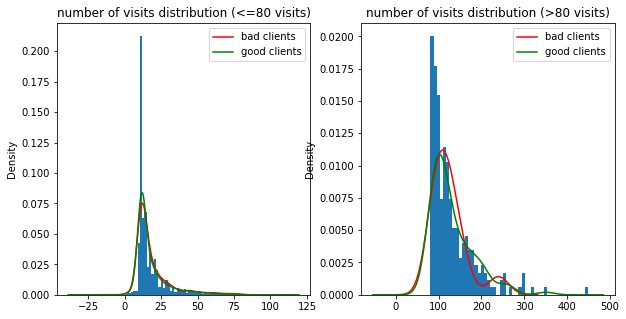

In [12]:
# Most borrowers did 10-20 visits
# Number of visits by clients - right skewed distribution, high kurtosis
# Pure 'number of visits' might not be a good feature at all
# Bad clients tend to visit a bit less pages than good clients

# Page visits (by client)

display('unique clients: {0}'.format( len(behav_default_df.client_id.unique()) ))

client_visits = behav_default_df[ ['id_ref', 'client_id'] ].groupby( by='client_id' ).agg('count')
client_visits['df'] = behav_default_df['df']

display('skew: {0}; kurtosis: {1}'.format(
    client_visits['id_ref'].skew(),
    client_visits['id_ref'].kurt()
))

display('all clients:')
fig, [ax_0, ax_1, ax_2] = plt.subplots( 1, 3, figsize=(16, 5) )
client_visits['id_ref'].hist(bins=50, ax=ax_0)
ax_0.set_title('number of visits distribution (all clients)')
client_visits[client_visits['id_ref']<=100]['id_ref'].hist(bins=50, ax=ax_1, density=True)
client_visits[client_visits['id_ref']<=100]['id_ref'].plot(kind='density', color='red', ax=ax_1)
ax_1.set_title('<=100 visits distribution')
client_visits[client_visits['id_ref']>100]['id_ref'].hist(bins=50, ax=ax_2, density=True)
client_visits[client_visits['id_ref']>100]['id_ref'].plot(kind='density', color='red', ax=ax_2)
ax_2.set_title('>100 visits distribution')
plt.show()

# Page visits (by bad clients)
bad_clients = behav_default_df[ behav_default_df['df'] == 'bad' ]

bad_clients_visits = bad_clients[ ['id_ref', 'client_id'] ].groupby( by='client_id' ).agg('count')

display('unique bad clients: {0}'.format( len(bad_clients.client_id.unique()) ))

display('skew: {0}; kurtosis: {1}'.format(
    bad_clients_visits['id_ref'].skew(),
    bad_clients_visits['id_ref'].kurt()
))

# .describe
display( bad_clients_visits.describe().T )

display('bad clients:')
fig, [ax_0, ax_1, ax_2] = plt.subplots( 1, 3, figsize=(16, 5) )
bad_clients_visits['id_ref'].hist(bins=50, ax=ax_0)
ax_0.set_title('number of visits distribution (bad clients)')
bad_clients_visits[bad_clients_visits['id_ref']<=80]['id_ref'].hist(bins=50, ax=ax_1, density=True)
bad_clients_visits[bad_clients_visits['id_ref']<=80]['id_ref'].plot(kind='density', color='red', ax=ax_1)
ax_1.set_title('<=80 visits distribution')
bad_clients_visits[bad_clients_visits['id_ref']>80]['id_ref'].hist(bins=50, ax=ax_2, density=True)
bad_clients_visits[bad_clients_visits['id_ref']>80]['id_ref'].plot(kind='density', color='red', ax=ax_2)
ax_2.set_title('>80 visits distribution')
plt.show()

# Good vs Bad Clients: kde plots
good_clients = behav_default_df[ behav_default_df['df'] == 'good' ]
good_clients_visits = good_clients[ ['id_ref', 'client_id'] ].groupby( by='client_id' ).agg('count')
fig, [ax_0, ax_1] = plt.subplots( 1, 2, figsize=(10, 5) )
client_visits[client_visits['id_ref']<=80]['id_ref'].hist(bins=50, ax=ax_0, density=True)
bad_clients_visits[bad_clients_visits['id_ref']<=80]['id_ref'].plot(kind='density', color='red', ax=ax_0)
good_clients_visits[good_clients_visits['id_ref']<=80]['id_ref'].plot(kind='density', color='green', ax=ax_0)
ax_0.set_title('number of visits distribution (<=80 visits)')
ax_0.legend(['bad clients', 'good clients'])
client_visits[client_visits['id_ref']>80]['id_ref'].hist(bins=50, ax=ax_1, density=True)
bad_clients_visits[bad_clients_visits['id_ref']>80]['id_ref'].plot(kind='density', color='red', ax=ax_1)
good_clients_visits[good_clients_visits['id_ref']>80]['id_ref'].plot(kind='density', color='green', ax=ax_1)
ax_1.set_title('number of visits distribution (>80 visits)')
ax_1.legend(['bad clients', 'good clients'])
plt.show()

In [13]:
# Number of devices by single client

# Most of clients (8065) have 1 device; Other clients (19) have 2 devices

client_devices_groupby = behav_default_df[ ['device_id', 'client_id'] ].groupby( by='client_id' )
client_devices_cnt = client_devices_groupby['device_id'].nunique()

display(client_devices_cnt.value_counts())

1    8065
2      19
Name: device_id, dtype: int64

In [14]:
# Convert create_time to datetime format

behav_default_df['create_time'] = pd.to_datetime( behav_default_df['create_time'] )

In [15]:
# Time spent on website

client_groupby = behav_default_df.groupby( by='client_id' )

def apply_timespent( client_id ):
    selected_group = client_groupby.get_group( client_id )
    selected_group = selected_group.sort_values( by='create_time' )
    time_spent_series = selected_group['create_time'].shift(-1) - selected_group['create_time']
    time_spent_series = time_spent_series[
        (time_spent_series / np.timedelta64(90, 'm')) <= 1.0
    ]  # Skip the rows where difference 
    total_time_spent = np.sum( time_spent_series )
    return total_time_spent

clients_df['time_spent'] = clients_df['client_id'].apply(
    lambda client_id: apply_timespent( client_id )
)

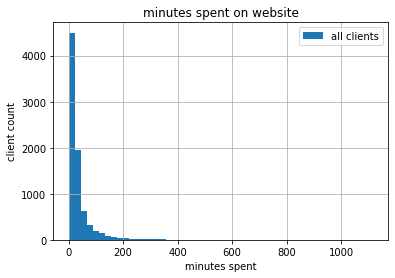

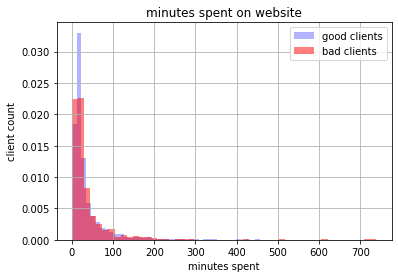

In [16]:
(clients_df['time_spent'] / np.timedelta64(1, 'm')).hist(bins=50)
plt.title('minutes spent on website')
plt.xlabel('minutes spent')
plt.ylabel('client count')
plt.legend(['all clients'])
plt.show()

(clients_df[ clients_df['df'] == 'good' ]['time_spent'] / np.timedelta64(1, 'm')).hist(bins=50, color='blue', alpha=0.3, density=True)
(clients_df[ clients_df['df'] == 'bad' ]['time_spent'] / np.timedelta64(1, 'm')).hist(bins=50, color='red', alpha=0.5, density=True)
plt.title('minutes spent on website')
plt.legend(['good clients', 'bad clients'])
plt.xlabel('minutes spent')
plt.ylabel('client count')
plt.show()

# Most clients gets a loan spending <1h on a website
# +- the same number of minutes spent for good and bad clients

1     5941
2     1063
3      513
4      260
5      107
6       85
7       49
8       22
9       15
12       7
10       7
11       5
14       3
13       3
16       2
20       1
18       1
Name: create_time_day, dtype: int64

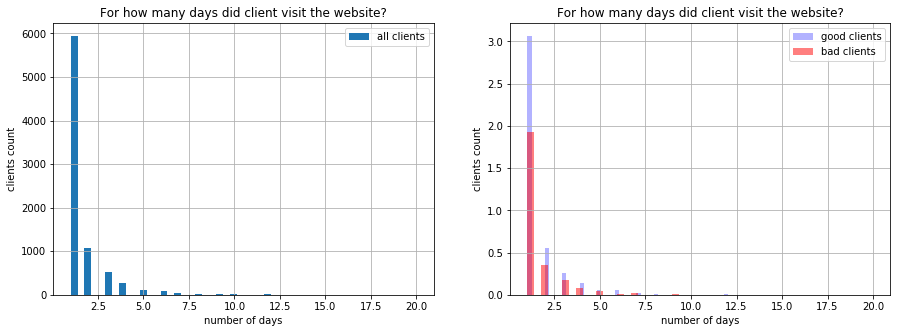

In [17]:
# Number of days when client visited a website

behav_default_df['create_time_day'] = behav_default_df['create_time'].dt.day

client_unique_days = client_groupby['create_time_day'].nunique()
display( client_unique_days.value_counts() )

clients_df['unique_days_visited'] = clients_df['client_id'].apply(
    lambda client_id: client_unique_days[client_id]
)

# display unique_days_visited distribution for all/good/bad clients
fig, [ax_0, ax_1] = plt.subplots( 1, 2, figsize=(15, 5))
clients_df['unique_days_visited'].hist(bins=50, ax=ax_0)
clients_df[clients_df['df'] == 'good']['unique_days_visited'].hist(bins=50, ax=ax_1, color='blue', alpha=0.3, density=True)
ax_0.set_title('For how many days did client visit the website?')
ax_0.set_xlabel('number of days')
ax_0.set_ylabel('clients count')
ax_0.legend(['all clients'])
clients_df[clients_df['df'] == 'bad']['unique_days_visited'].hist(bins=50, ax=ax_1, color='red', alpha=0.5, density=True)
ax_1.set_title('For how many days did client visit the website?')
ax_1.set_xlabel('number of days')
ax_1.set_ylabel('clients count')
ax_1.legend(['good clients', 'bad clients'])
plt.show()

# Most of clients spend only 1 day on a website
# bad clients tend to spend less days on a website

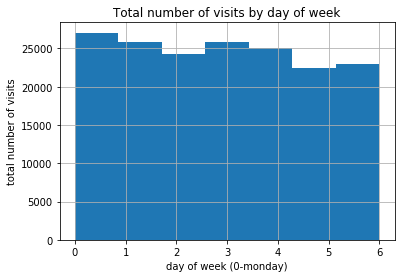

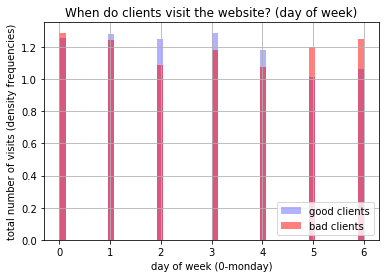

In [18]:
# Most frequent day of the week for visiting the website

# Bad clients tend to visit website on saturday/sunday, good clients - vice versa

behav_default_df['create_time_dayofweek'] = behav_default_df['create_time'].dt.dayofweek

behav_default_df['create_time_dayofweek'].hist(bins=7);
plt.title('Total number of visits by day of week')
plt.xlabel('day of week (0-monday)')
plt.ylabel('total number of visits')
plt.show()

def apply_most_frequent_visit_dayofweek( client_id ):
    selected_group = client_groupby.get_group( client_id )
    return selected_group['create_time_dayofweek'].value_counts().index[0]

clients_df['most_freq_visit_dayofweek'] = clients_df['client_id'].apply(
    lambda client_id: apply_most_frequent_visit_dayofweek( client_id )
)

fig, ax = plt.subplots()
clients_df[clients_df['df'] == 'good']['most_freq_visit_dayofweek'].hist(bins=50, ax=ax, color='blue', alpha=0.3, density=True)
clients_df[clients_df['df'] == 'bad']['most_freq_visit_dayofweek'].hist(bins=50, ax=ax, color='red', alpha=0.5, density=True)
ax.legend(['good clients', 'bad clients'], loc='lower right')
ax.set_title('When do clients visit the website? (day of week)')
ax.set_xlabel('day of week (0-monday)')
ax.set_ylabel('total number of visits (density frequencies)')
plt.show()

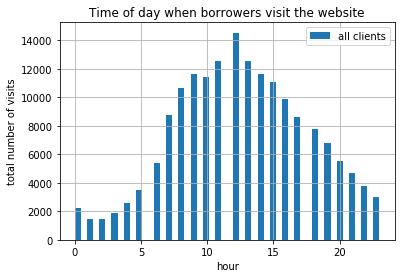

count    8084.000000
mean       12.791192
std         5.013548
min         0.000000
25%         9.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: most_freq_visit_hour, dtype: float64

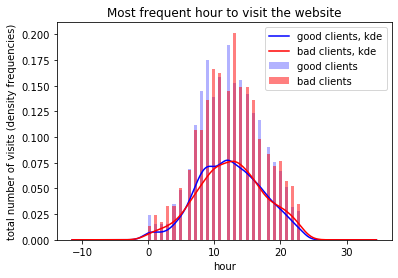

In [19]:
# Most frequent daytime for visiting the website

behav_default_df['create_time'].dt.hour.hist(bins=50)
plt.title('Time of day when borrowers visit the website')
plt.ylabel('total number of visits')
plt.xlabel('hour')
plt.legend(['all clients'])
plt.show()

# fig, ax = plt.subplots()
# behav_default_df[behav_default_df['df'] == 'good']['create_time'].dt.hour.hist(bins=50, ax=ax, color='blue', alpha=0.3, density=True)
# behav_default_df[behav_default_df['df'] == 'bad']['create_time'].dt.hour.hist(bins=50, ax=ax, color='red', alpha=0.5, density=True)
# plt.title('Time of day when bad/good borrowers visit the website')
# plt.ylabel('total number of visits (density)')
# plt.xlabel('hour')
# plt.legend(['good clients', 'bad clients'])
# plt.show()


def apply_visit_median( client_id ):
    selected_group = client_groupby.get_group( client_id )
    return selected_group['create_time'].dt.hour.value_counts().index[0]

clients_df['most_freq_visit_hour'] = clients_df['client_id'].apply(
    lambda client_id: apply_visit_median( client_id )
)

# .describe
display( clients_df['most_freq_visit_hour'].describe().T )

fig, ax = plt.subplots()
clients_df[clients_df['df'] == 'good']['most_freq_visit_hour'].hist(bins=50, ax=ax, color='blue', alpha=0.3, density=True)
clients_df[clients_df['df'] == 'bad']['most_freq_visit_hour'].hist(bins=50, ax=ax, color='red', alpha=0.5, density=True)
clients_df[clients_df['df'] == 'good']['most_freq_visit_hour'].plot(kind='density', ax=ax, color='blue')
clients_df[clients_df['df'] == 'bad']['most_freq_visit_hour'].plot(kind='density', ax=ax, color='red')
ax.legend(['good clients, kde', 'bad clients, kde', 'good clients', 'bad clients'])
ax.set_title('Most frequent hour to visit the website')
ax.set_xlabel('hour')
ax.set_ylabel('total number of visits (density frequencies)')
plt.show()

# Bad borrowers tend to visit the website in the early hours (1-3hh) and in late hours (20-22hh)
# Good borrowers visit the website on morning hours (7-9hh)

# It might be a good idea to create bins for morning/working day/evening/late hours

'min application creation date:'

Timestamp('2017-07-01 03:59:02+0000', tz='UTC')

'max application creation date:'

Timestamp('2017-12-31 20:42:07+0000', tz='UTC')

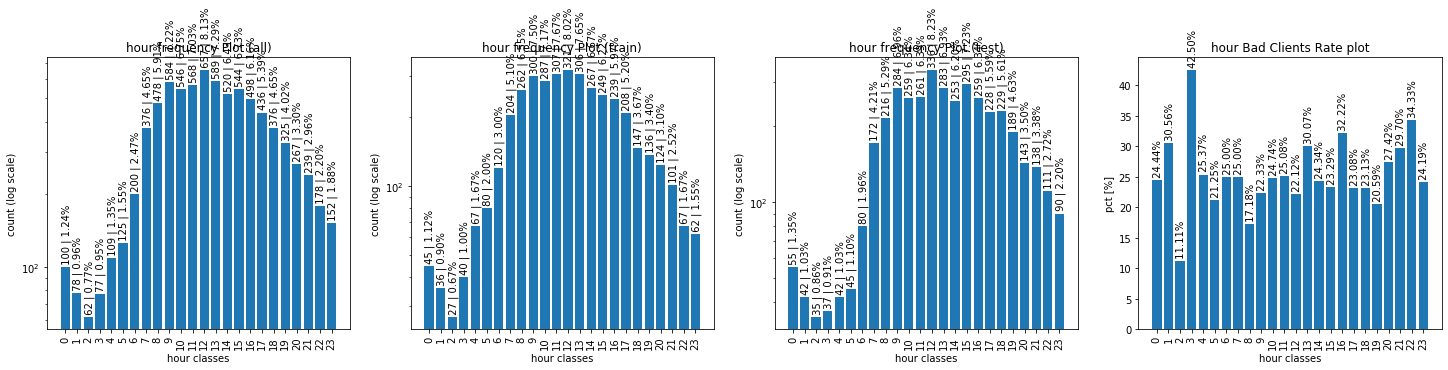

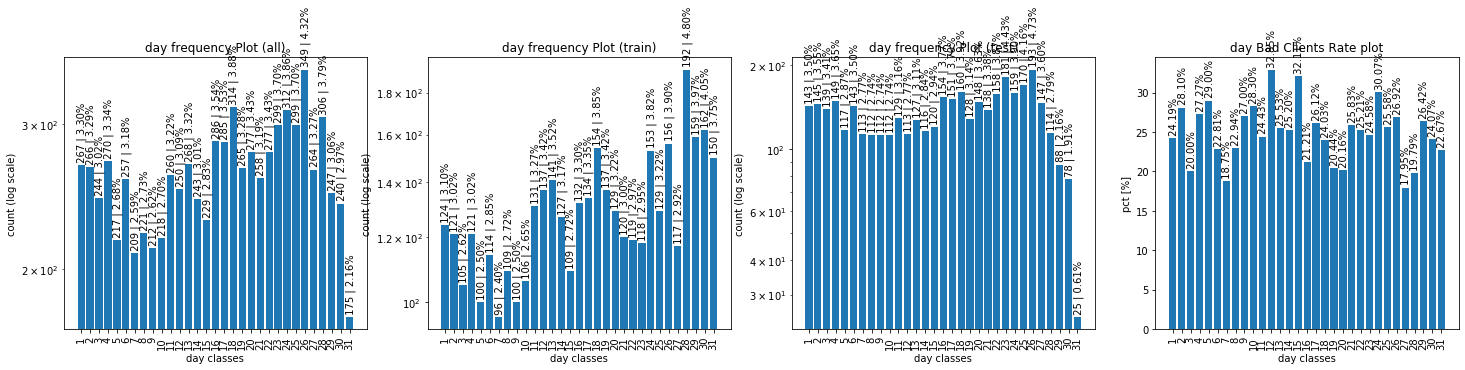

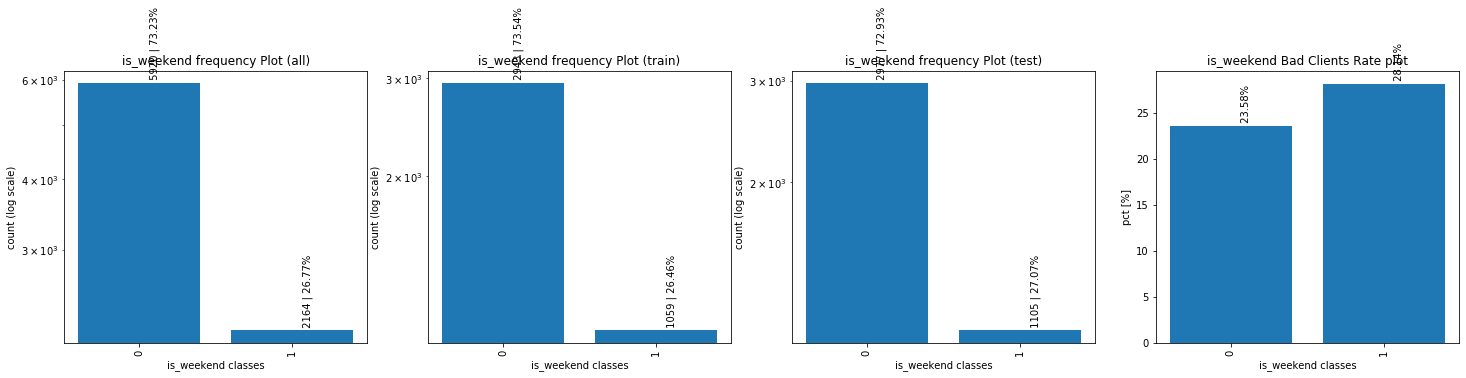

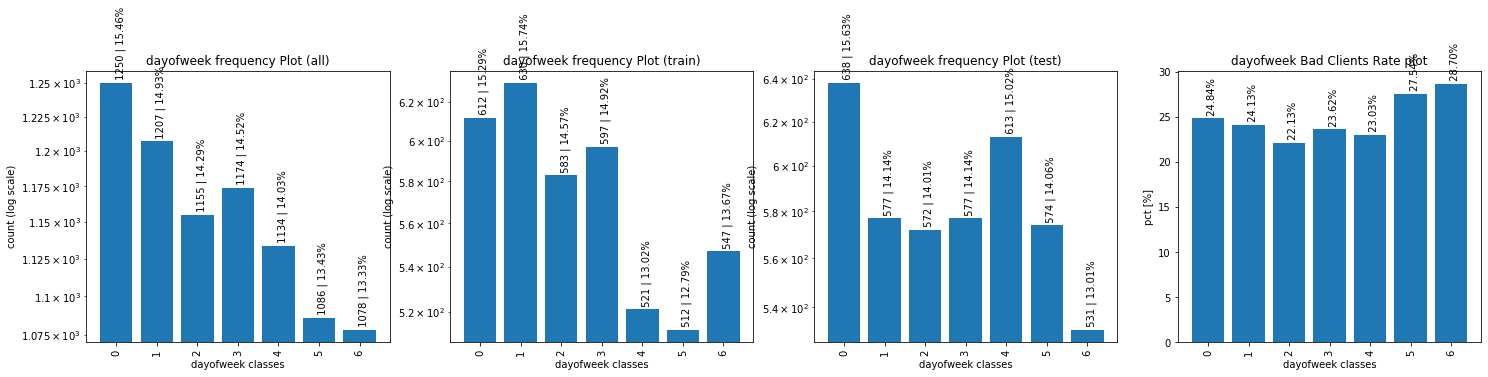

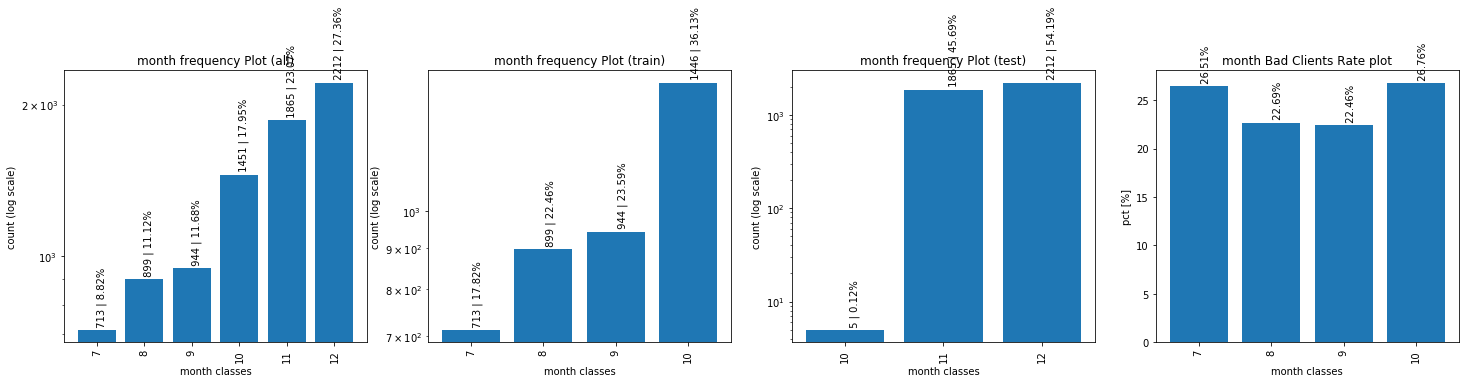

In [20]:
# Application date and time

clients_df['app_crtime'] = pd.to_datetime( clients_df['app_crtime'] ) 

display( 'min application creation date:', clients_df['app_crtime'].min(), 'max application creation date:', clients_df['app_crtime'].max() ) 

# Hour of creating an application
# Might be useful to have +3 hours skew - so that start of coordinates is at the minimum
# "early hours" or "late hours" - might be useful
overview_cat_feature_freq(
    pd.DataFrame({
        'hour': clients_df['app_crtime'].dt.hour,
        'df': clients_df['df']
    }),
    'hour'
)

# Day of creating an application
# Might be useful to identify "salary day" (end of 1st week?)
# Might be useful to identify "high fail rate days" ( > 25% fail rate)
# Train and test set differ a lot by frequency
overview_cat_feature_freq(
    pd.DataFrame({
        'day': clients_df['app_crtime'].dt.day,
        'df': clients_df['df']
    }),
    'day'
)

# Creating an application on weekends/working day 
# Might be useful in the model
is_weekend_df = pd.DataFrame({
    'is_weekend': (clients_df['app_crtime'].dt.dayofweek >= 5),
    'df': clients_df['df']
})
is_weekend_df['is_weekend'] = is_weekend_df['is_weekend'].astype(int)
overview_cat_feature_freq(
    is_weekend_df,
    'is_weekend'
)

# Day of week of creating an application
# Note: train set: lots of observations for sunday, small amnt of observations for friday-saturday
# whereas in test set: lots of observations for friday-saturday, small amnt of observations for sunday
# is_weekend might still be a good feature
overview_cat_feature_freq(
    pd.DataFrame({
        'dayofweek': clients_df['app_crtime'].dt.dayofweek,
        'df': clients_df['df']
    }),
    'dayofweek'
)

# Month of creating an application
# Note: train set: months 7-10, test set: months 10-12.
# This might be NOT a good feature
overview_cat_feature_freq(
    pd.DataFrame({
        'month': clients_df['app_crtime'].dt.month,
        'df': clients_df['df']
    }),
    'month'
)

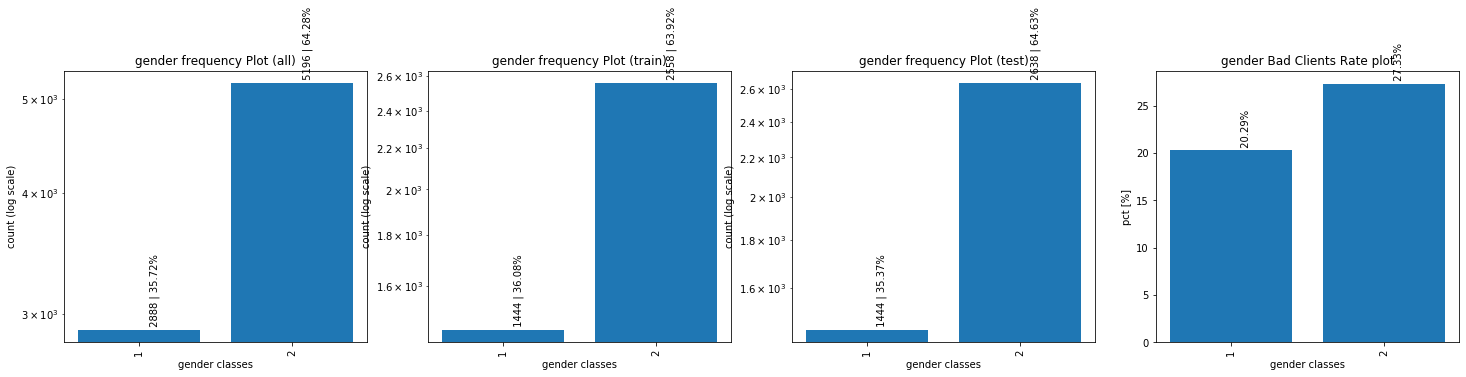

In [21]:
# Gender
# Pretty good, but unbalanced feature

overview_cat_feature_freq( clients_df, 'gender' )

count     8084.000000
mean     10640.431593
std       3045.220116
min       6575.000000
25%       8493.000000
50%       9978.000000
75%      11939.500000
max      27683.000000
Name: days_from_birth, dtype: float64

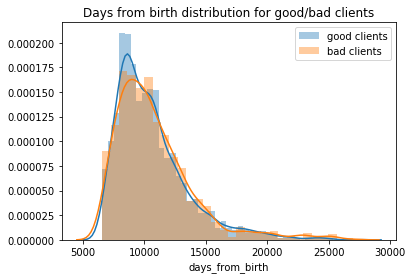

In [22]:
# Birth date 'birth'

# Format it to "days from birth" as DAYS(application_date-birth)

# Yung people are at high risk of becoming 'bad' clients
# There are clear bins: <20yo (bad), 20-25yo (good), 25-30yo (bad), 30-35 (30-50) (same), 55-60yo, >60yo

clients_df['birth'] = pd.to_datetime( clients_df['birth'] )
clients_df['app_crtime'] = pd.to_datetime( clients_df['app_crtime'] )

clients_df['days_from_birth'] = clients_df['app_crtime'].dt.date - clients_df['birth'].dt.date
clients_df['days_from_birth'] = clients_df['days_from_birth'].apply(
    lambda timedelta_value: timedelta_value.days
)

# .describe
display( clients_df['days_from_birth'].describe() )

sns.distplot(
    clients_df[clients_df['df'] == 'good']['days_from_birth'],
    label='good clients'
)
sns.distplot(
    clients_df[clients_df['df'] == 'bad']['days_from_birth'],
    label='bad clients'
)
plt.title('Days from birth distribution for good/bad clients')
plt.legend()
plt.show()

count    8084.000000
mean       19.285379
std         6.951491
min         0.000000
25%        16.000000
50%        16.000000
75%        22.000000
max        60.000000
dtype: float64

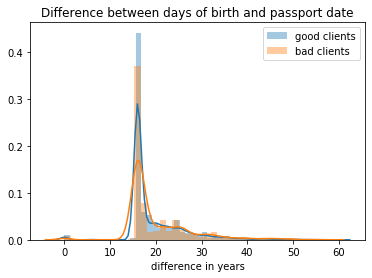

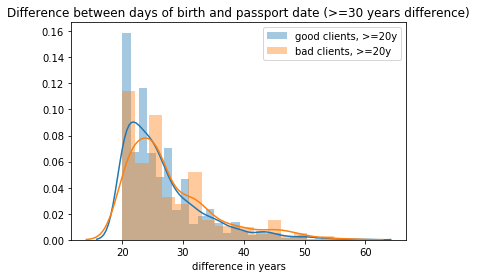

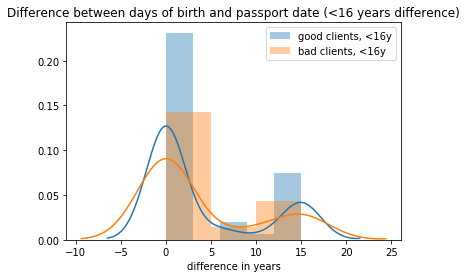

In [23]:
# Pass bdate

# Might be a useful feature to detect scams

clients_df['pass_bdate'] = pd.to_datetime( clients_df['pass_bdate'] )

pass_bdate_birthdate_diff = clients_df['pass_bdate'] - clients_df['birth']
pass_bdate_birthdate_diff = pass_bdate_birthdate_diff.apply( lambda x: x.days )
AVG_DAYS_IN_YEAR = 365
pass_bdate_birthdate_diff /= AVG_DAYS_IN_YEAR

# Try to replace NaN values with 0 - assume these observations are scams
# Replace 110 values
pass_bdate_birthdate_diff = pass_bdate_birthdate_diff.fillna( 0 )

# Drop floating point part
pass_bdate_birthdate_diff = pass_bdate_birthdate_diff.astype(int)

# .describe
display( pass_bdate_birthdate_diff.describe() )

clients_df['bdate_passdate_diff'] = pass_bdate_birthdate_diff

sns.distplot(
    clients_df[clients_df['df'] == 'good']['bdate_passdate_diff'],
    label='good clients'
)
sns.distplot(
    clients_df[clients_df['df'] == 'bad']['bdate_passdate_diff'],
    label='bad clients'
)
plt.title('Difference between days of birth and passport date')
plt.legend()
plt.xlabel('difference in years')
plt.show()

sns.distplot(
    clients_df[(clients_df['bdate_passdate_diff'] >= 20) & (clients_df['df'] == 'good')]['bdate_passdate_diff'],
    label='good clients, >=20y'
)

sns.distplot(
    clients_df[(clients_df['bdate_passdate_diff'] >= 20) & (clients_df['df'] == 'bad')]['bdate_passdate_diff'],
    label='bad clients, >=20y'
)
plt.title('Difference between days of birth and passport date (>=30 years difference)')
plt.xlabel('difference in years')
plt.legend()
plt.show()

sns.distplot(
    clients_df[(clients_df['bdate_passdate_diff'] < 16) & (clients_df['df'] == 'good')]['bdate_passdate_diff'],
    label='good clients, <16y'
)

sns.distplot(
    clients_df[(clients_df['bdate_passdate_diff'] < 16) & (clients_df['df'] == 'bad')]['bdate_passdate_diff'],
    label='bad clients, <16y'
)
plt.title('Difference between days of birth and passport date (<16 years difference)')
plt.xlabel('difference in years')
plt.legend()
plt.show()

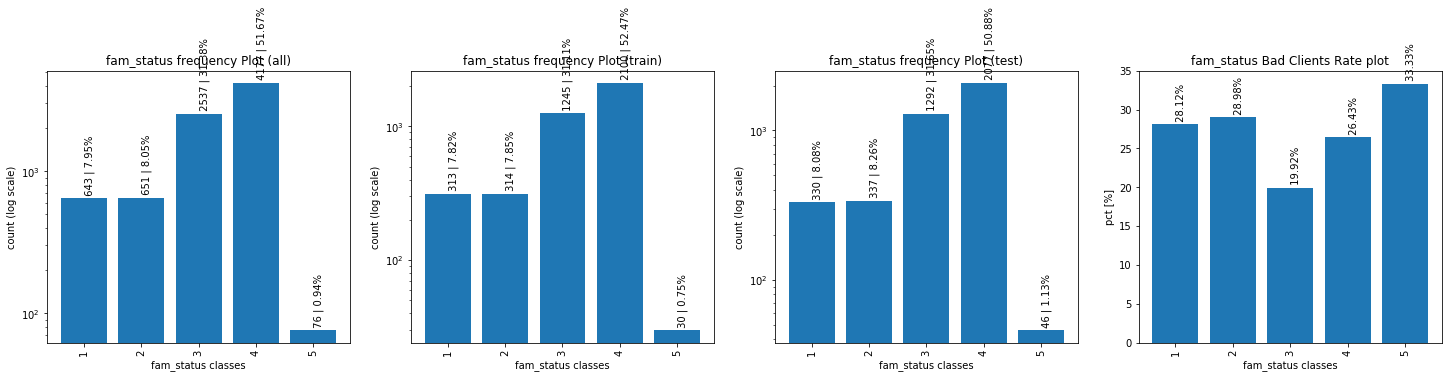

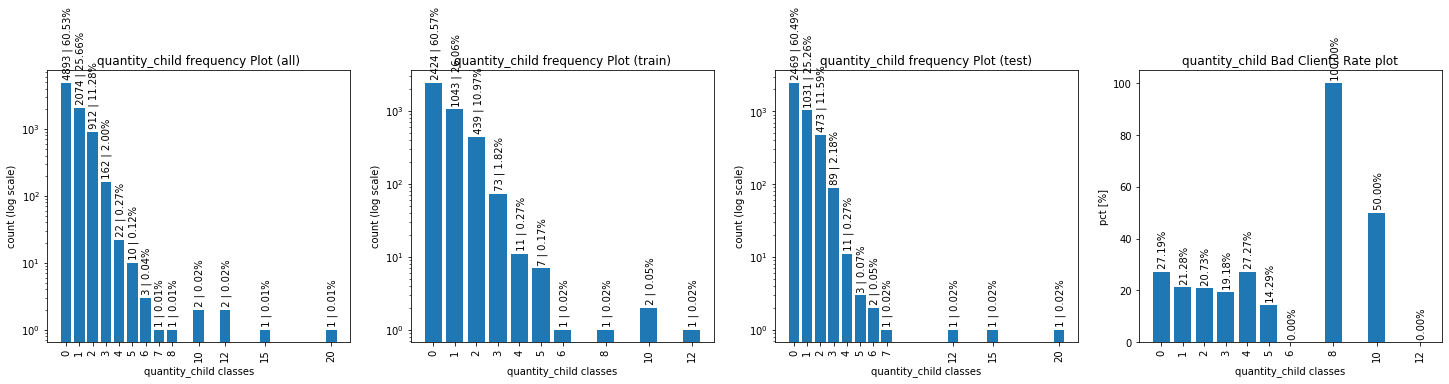

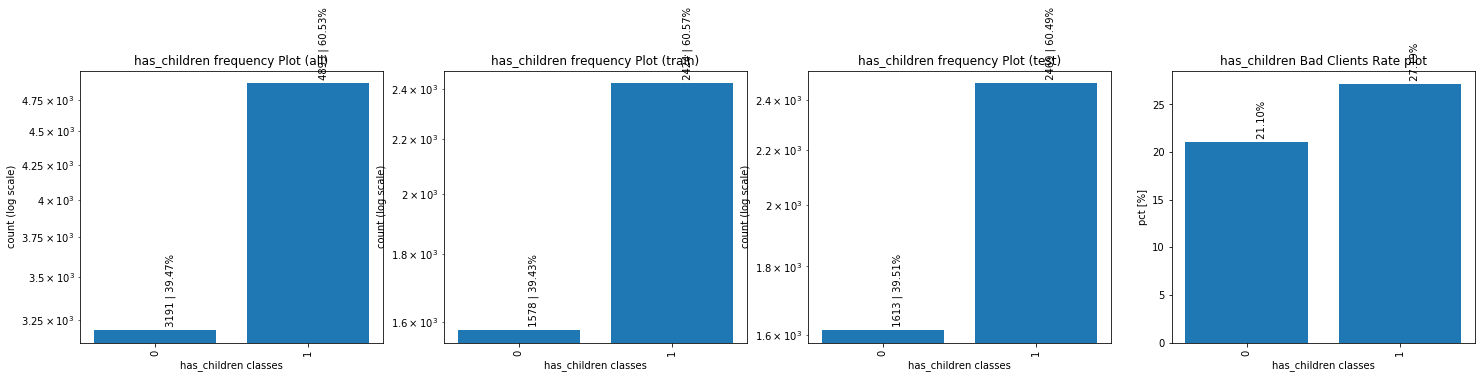

In [24]:
# Family-related features

# Family status:
# Divide into 3 categories (look at bad clients rate): 1-2-4, 3, 5 (avg, lowest, max bad client rate)
overview_cat_feature_freq( clients_df, 'fam_status' )

# Child quantity
# Might not be a good feature
# Divide into categories of 0, 1, 2, 3, 4, >4 kids
overview_cat_feature_freq( clients_df, 'quantity_child' )

# max_age_child
# overview_cat_feature_freq( clients_df, 'max_age_child' )

# has_children
# This feature might be better than "child quantity"
has_children_df = clients_df['quantity_child'] == 0
overview_cat_feature_freq(
    pd.DataFrame({
        'has_children': has_children_df.astype(int),
        'df': clients_df['df']
    }),
    'has_children'
)

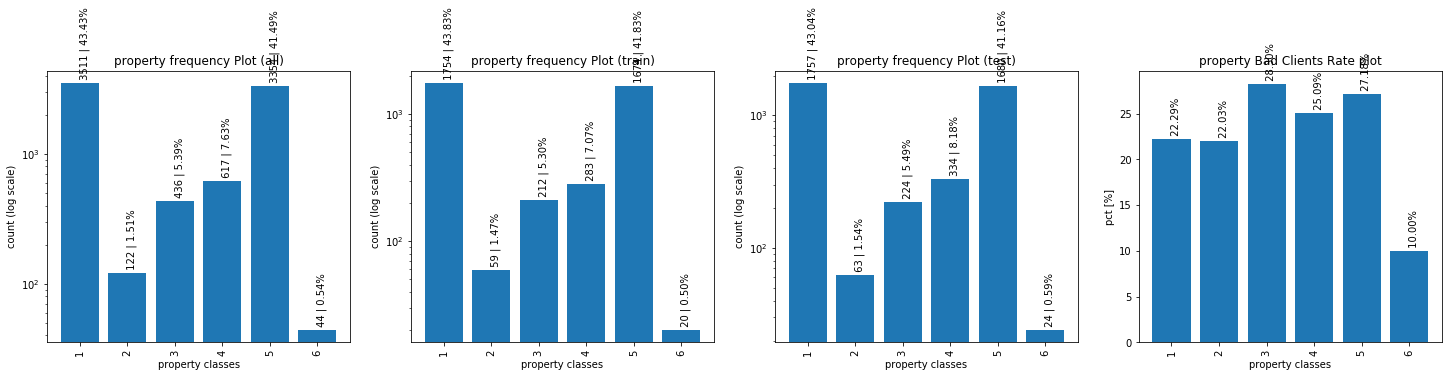

In [25]:
# Property

# Combine by bad clients rate into 3 categories: 1-2-4, 3-5, 6 (avg, highest, lowest bad clients rate)
overview_cat_feature_freq( clients_df, 'property' )

count     8084.000000
mean       838.950520
std       2506.135802
min     -18354.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17866.000000
dtype: float64

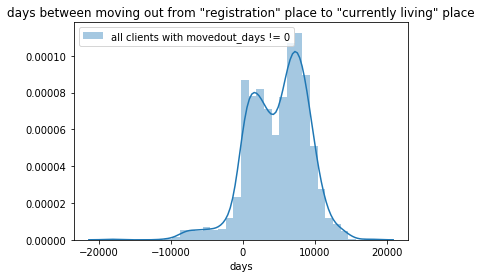

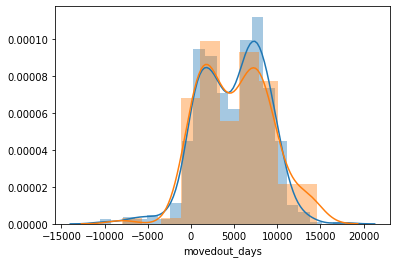

In [26]:
# Days 

# Features lived_since and is_same_reg_lived_since might be really good identificators for fraud detection

clients_df['lived_since'] = pd.to_datetime( clients_df['lived_since'] )
clients_df['is_same_reg_lived_since'] = pd.to_datetime( clients_df['is_same_reg_lived_since'] )

# Overview time interval when client moved out from registration place
# Might be NOT a good feature - don't know how to utilize it

movedout_days = clients_df['lived_since'] - clients_df['is_same_reg_lived_since']
movedout_days = movedout_days.apply( lambda x: x.days )
clients_df['movedout_days'] = movedout_days

# .describe
display( movedout_days.describe() )

sns.distplot(
    clients_df[clients_df['movedout_days'] != 0]['movedout_days'],
    label='all clients with movedout_days != 0'
)
plt.title('days between moving out from "registration" place to "currently living" place')
plt.xlabel('days')
plt.legend()
plt.show()

sns.distplot(
    clients_df[(clients_df['movedout_days'] != 0) & (clients_df['df'] == 'good')]['movedout_days'],
    label='all GOOD clients with movedout_days != 0'
)
sns.distplot(
    clients_df[(clients_df['movedout_days'] != 0) & (clients_df['df'] == 'bad')]['movedout_days'],
    label='all BAD clients with movedout_days != 0'
)
plt.show()

'People with currently living region == registration region:'

False    8069
True       15
dtype: int64

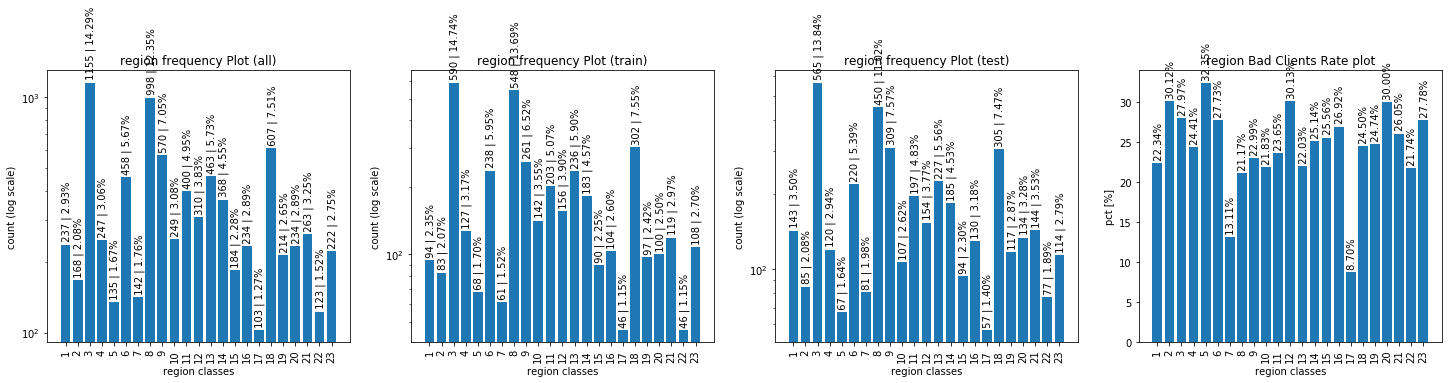

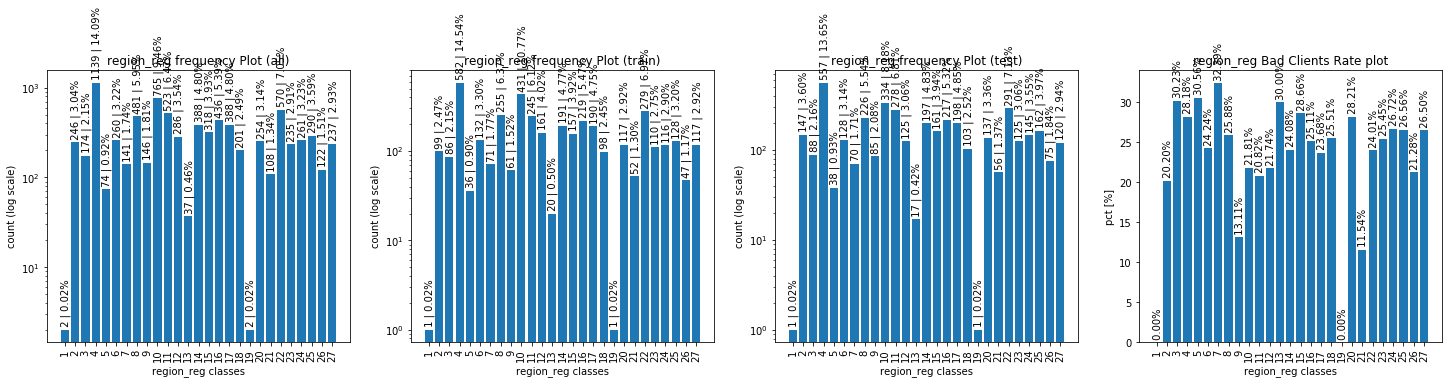

In [27]:
# Region

display('People with currently living region == registration region:')
display( (clients_df['region'] == clients_df['region_reg']).value_counts() )

# As a feature - identify regions with high/low/avg bad clients rate
overview_cat_feature_freq( clients_df, 'region' )
overview_cat_feature_freq( clients_df, 'region_reg' )

Days at last work, GOOD clients:


count     3010.000000
mean      2298.990365
std       4198.377536
min         -6.000000
25%        319.000000
50%        817.500000
75%       2015.750000
max      17469.000000
Name: curjob_working_days, dtype: float64

Days at last work, BAD clients:


count      992.000000
mean      1869.614919
std       3641.222387
min          0.000000
25%        273.750000
50%        742.500000
75%       1619.250000
max      17469.000000
Name: curjob_working_days, dtype: float64

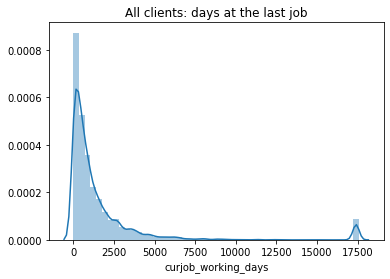

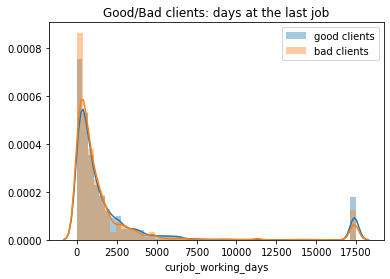

In [28]:
# Job-related features

# jobsworksince
# Convert it to 'days work since'

clients_df['jobsworksince'] = pd.to_datetime( clients_df['jobsworksince'] )
clients_df['curjob_working_days'] = clients_df['app_crtime'].dt.date - clients_df['jobsworksince'].dt.date

# there are 687 NaN values - assume these have no job experience
clients_df['curjob_working_days'] = clients_df['curjob_working_days'].fillna( pd.Timedelta(seconds=0) )
clients_df['curjob_working_days'] = clients_df['curjob_working_days'].apply( lambda x: x.days )

# .describe()
print('Days at last work, GOOD clients:')
display( clients_df[clients_df['df'] == 'good']['curjob_working_days'].describe().T )

print('Days at last work, BAD clients:')
display( clients_df[clients_df['df'] == 'bad']['curjob_working_days'].describe().T )

sns.distplot(
    clients_df['curjob_working_days']
)
plt.title('All clients: days at the last job')
plt.show()

sns.distplot(
    clients_df[clients_df['df'] == 'good']['curjob_working_days'],
    label='good clients'
)
sns.distplot(
    clients_df[clients_df['df'] == 'bad']['curjob_working_days'],
    label='bad clients'
)
plt.title('Good/Bad clients: days at the last job')
plt.legend()
plt.show()

'WORK EPXERIENCE <= 20 years'

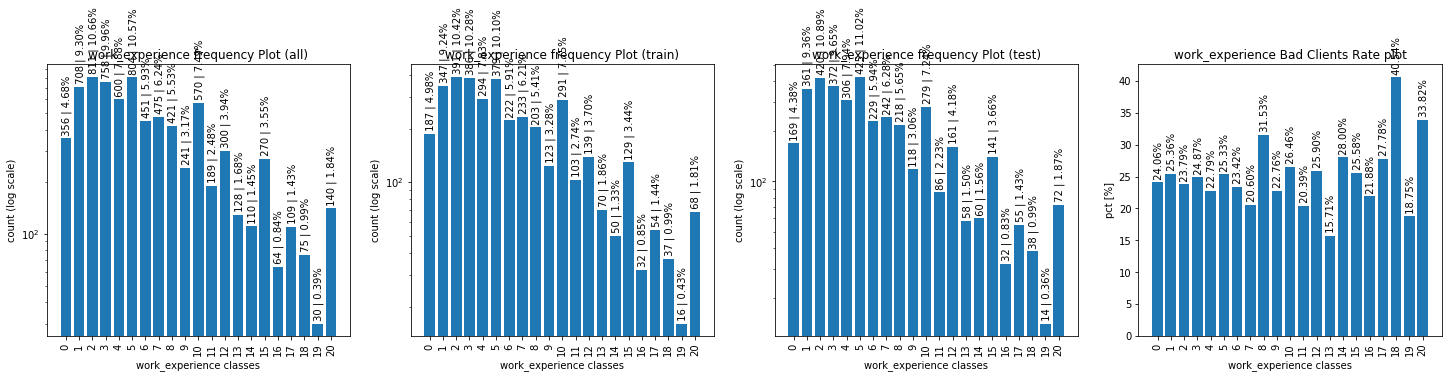

'WORK EPXERIENCE [20;50] years'

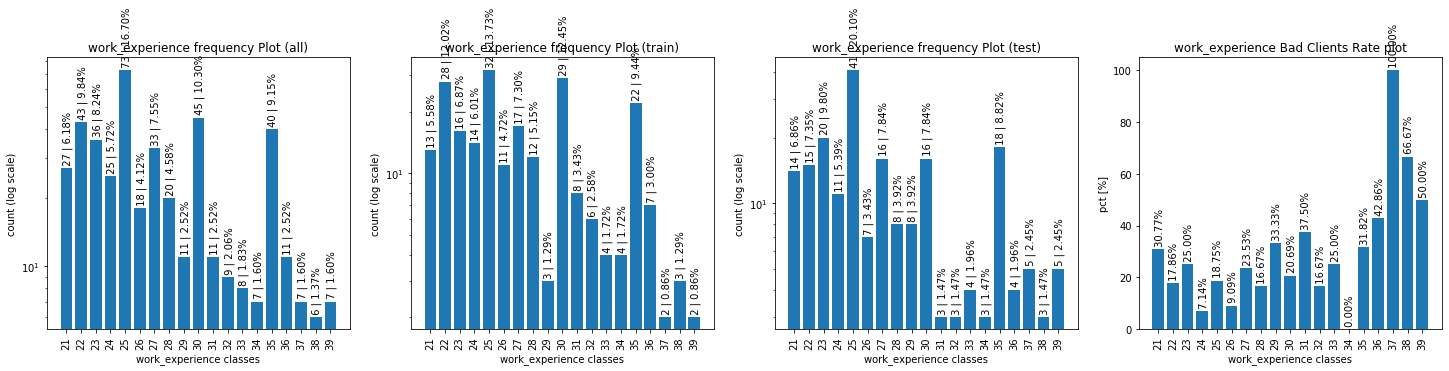

'WORK EXPERIENCE >=40 years'

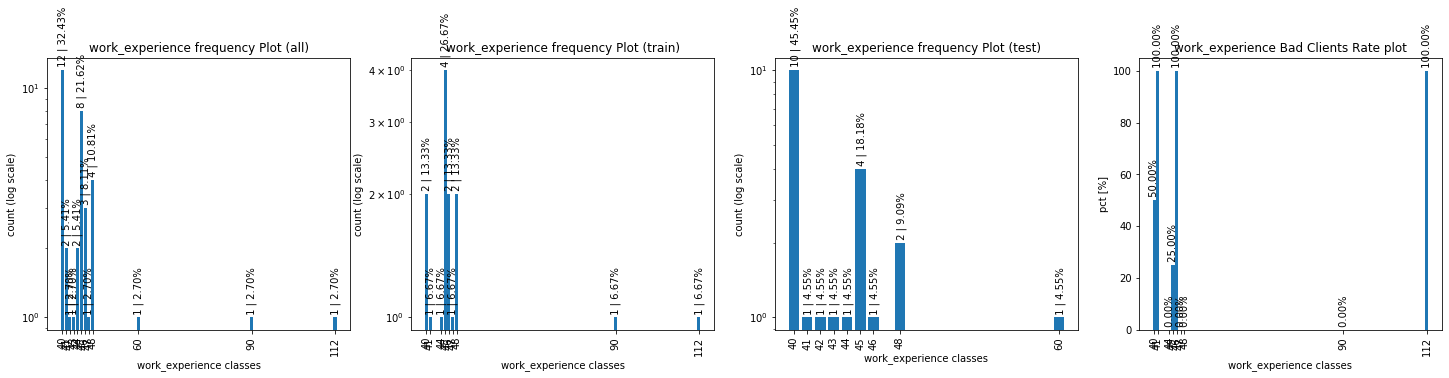

In [29]:
# Total job experience (probably in years)

# Divide into several bins: 0-17, 18-21, 22-36, >37
# Create % of bad clients by work experience - <20%, 20-25%, 25-35%, >35% bad clients rate

display('WORK EPXERIENCE <= 20 years')
overview_cat_feature_freq( clients_df[clients_df['work_experience'] <= 20], 'work_experience' )
display('WORK EPXERIENCE [20;50] years')
overview_cat_feature_freq( clients_df[(clients_df['work_experience'] > 20) & (clients_df['work_experience'] < 40)], 'work_experience' )
display('WORK EXPERIENCE >=40 years')
overview_cat_feature_freq( clients_df[clients_df['work_experience'] >= 40], 'work_experience' )

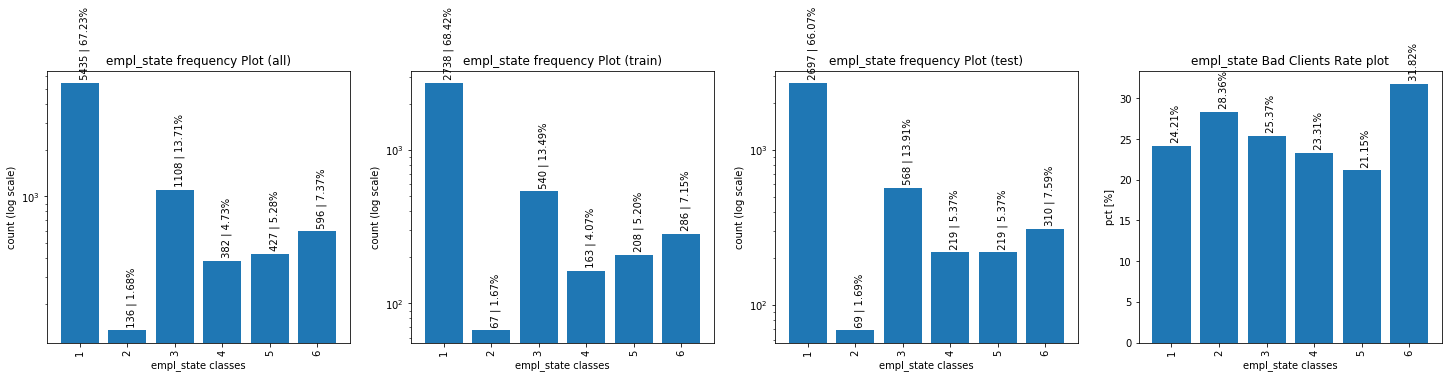

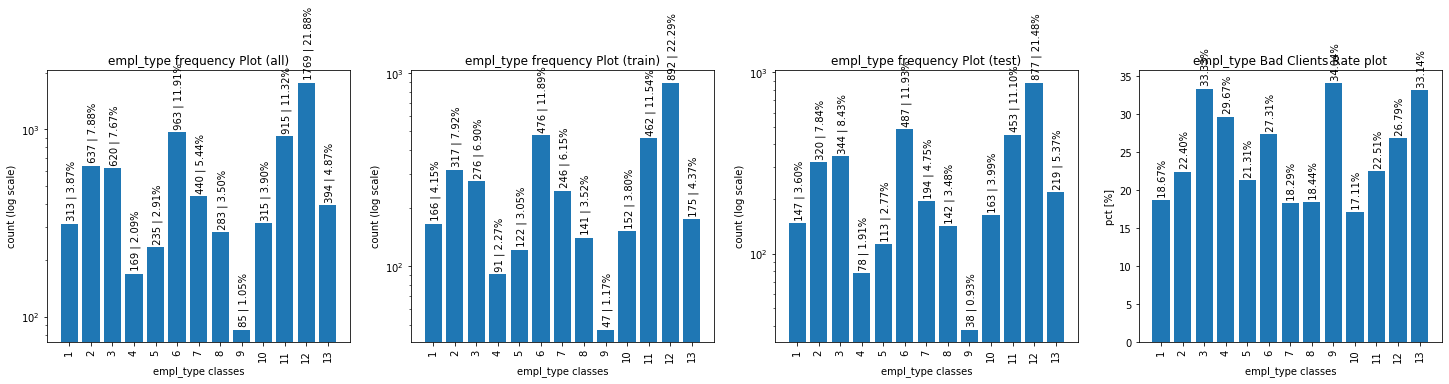

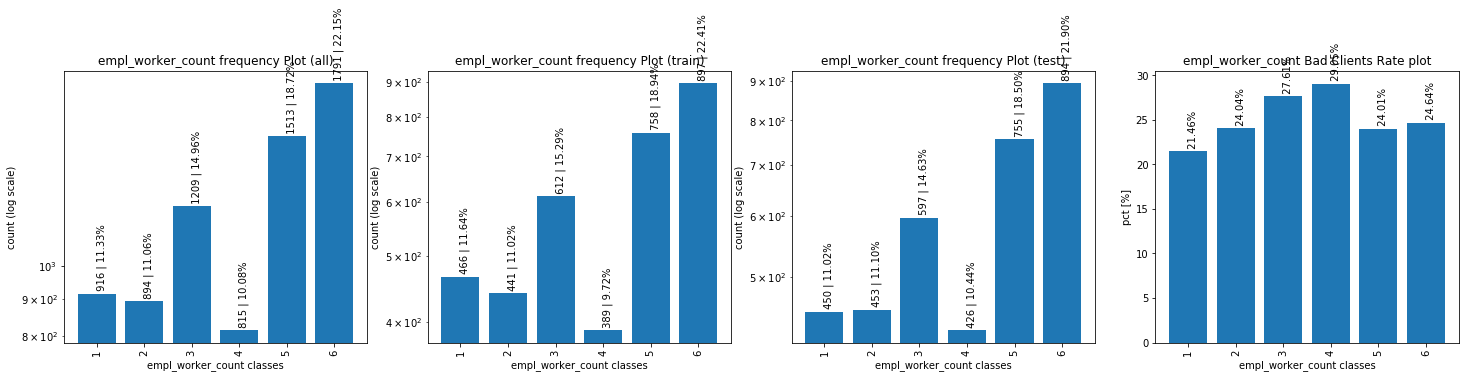

In [30]:
# empl_state, empl_type and empl_worker_count

# empl_state: 2 bins: 1-3-4-5 and 2-6
overview_cat_feature_freq( clients_df, 'empl_state' )

# empl_type: 3 bins by bad clients rate: <20%, 20-30%, >30%
overview_cat_feature_freq( clients_df, 'empl_type' )

# empl_worker_count : 3 bins by bad clients rate: 1, 2-5-6, 3-4
overview_cat_feature_freq( clients_df, 'empl_worker_count' )

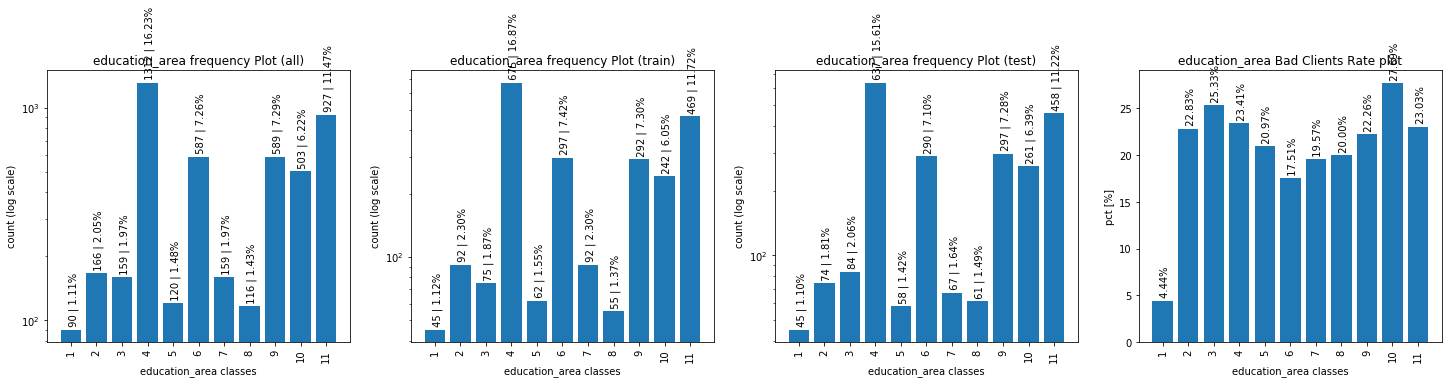

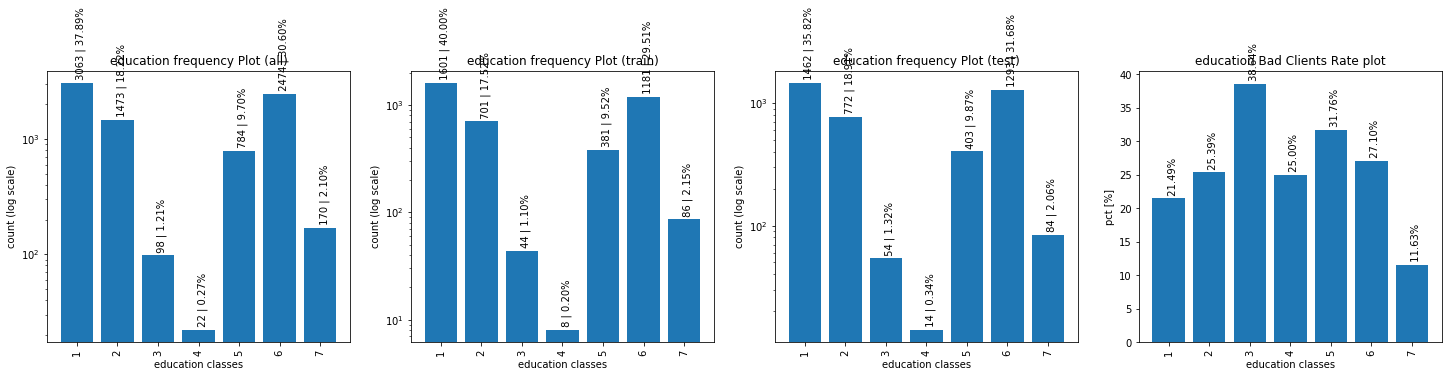

In [31]:
# Education-related features

# education_area
# Bin by bad clients rate: 1, 5-6-7-8, 2-4-9-11, 3-10
overview_cat_feature_freq( clients_df, 'education_area' )

# education
# Bin by bad clients rate: 7, 1-2-4-6, 3-5
overview_cat_feature_freq( clients_df, 'education' )

'monthly income:'

count      8084.000000
mean       8147.017071
std        6880.490610
min           3.000000
25%        5000.000000
50%        7000.000000
75%        9100.000000
max      150000.000000
Name: monthlyincome, dtype: float64

'monthly cost:'

count      8084.000000
mean       3956.751237
std        4057.347498
min           1.000000
25%        2000.000000
50%        3000.000000
75%        5000.000000
max      150000.000000
Name: monthlycost, dtype: float64

'Monthly income and monthly cost correlation matrix:'

,monthlycost,monthlyincome
monthlycost,1.000000,0.501971
monthlyincome,0.501971,1.000000


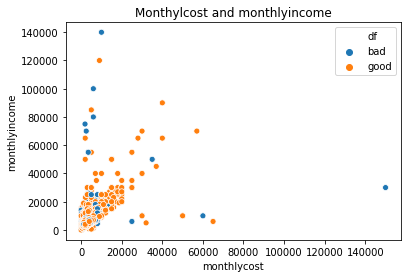

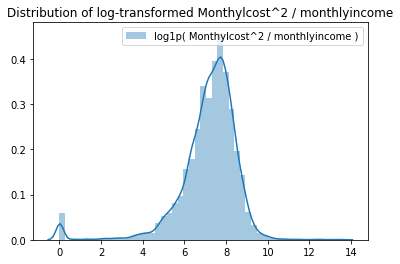

In [32]:
# Income and expenses

display('monthly income:', clients_df['monthlyincome'].describe().T )
display('monthly cost:', clients_df['monthlycost'].describe().T )

display(
    'Monthly income and monthly cost correlation matrix:',
    clients_df[ ['monthlycost', 'monthlyincome'] ].corr()
)

sns.scatterplot(
    'monthlycost',
    'monthlyincome',
    hue='df',
    data=clients_df
)
plt.title('Monthylcost and monthlyincome')
plt.show()

sns.distplot(
    np.log1p( clients_df['monthlycost']**2 / clients_df['monthlyincome'] )
)
plt.legend(['log1p( Monthylcost^2 / monthlyincome )'])
plt.title('Distribution of log-transformed Monthylcost^2 / monthlyincome')
plt.show()

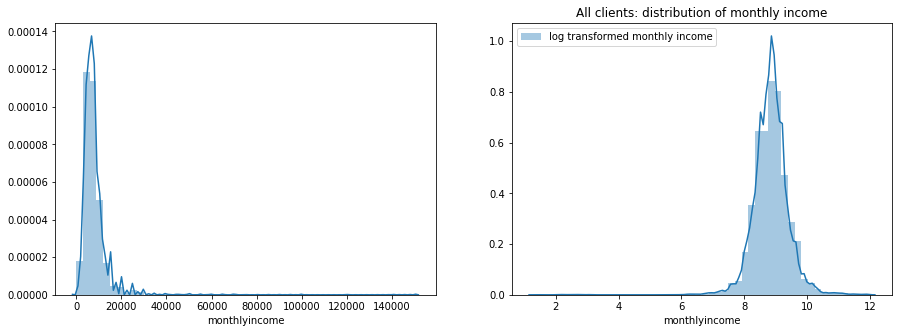

count      8084.000000
mean       3956.751237
std        4057.347498
min           1.000000
25%        2000.000000
50%        3000.000000
75%        5000.000000
max      150000.000000
Name: monthlycost, dtype: float64

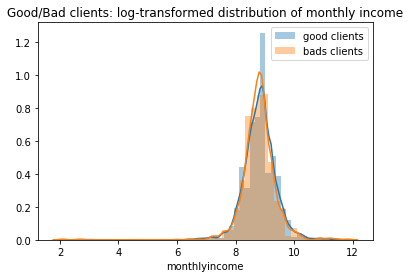

In [33]:
# Income

# In general, income should NOT be the major feature for credit risk
# However, income/expenses might be the one.

# Income has lots of outliers 

fig, [ax_0, ax_1] = plt.subplots( 1, 2, figsize=(15, 5) )
sns.distplot( clients_df['monthlyincome'], ax=ax_0, label='monthly income' )
sns.distplot( np.log1p(clients_df['monthlyincome']), ax=ax_1, label='log transformed monthly income' )
plt.legend()
plt.title('All clients: distribution of monthly income')
plt.show()

display( clients_df['monthlycost'].describe() )

sns.distplot(
    np.log1p(
        clients_df[clients_df['df'] == 'good']['monthlyincome']
    ),
    label='good clients'
)
sns.distplot(
    np.log1p(
        clients_df[clients_df['df'] == 'bad']['monthlyincome']
    ),
    label='bads clients'
)
plt.title('Good/Bad clients: log-transformed distribution of monthly income')
plt.legend()
plt.show()

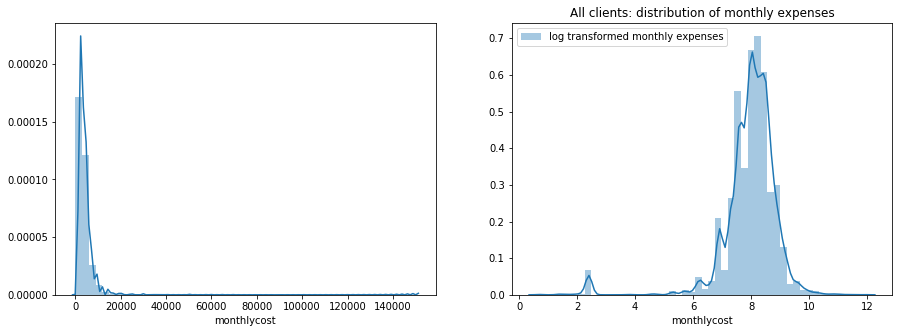

count      8084.000000
mean       3956.751237
std        4057.347498
min           1.000000
25%        2000.000000
50%        3000.000000
75%        5000.000000
max      150000.000000
Name: monthlycost, dtype: float64

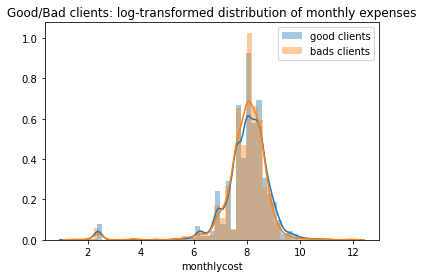

In [34]:
# monthlycost

fig, [ax_0, ax_1] = plt.subplots( 1, 2, figsize=(15, 5) )
sns.distplot( clients_df['monthlycost'], ax=ax_0, label='monthly expenses' )
sns.distplot( np.log1p(clients_df['monthlycost']), ax=ax_1, label='log transformed monthly expenses' )
plt.legend()
plt.title('All clients: distribution of monthly expenses')
plt.show()

display( clients_df['monthlycost'].describe() )

sns.distplot(
    np.log1p(
        clients_df[clients_df['df'] == 'good']['monthlycost']
    ),
    label='good clients'
)
sns.distplot(
    np.log1p(
        clients_df[clients_df['df'] == 'bad']['monthlycost']
    ),
    label='bads clients'
)
plt.title('Good/Bad clients: log-transformed distribution of monthly expenses')
plt.legend()
plt.show()

count      8084.000000
mean       4190.265834
std        5981.356330
min     -120000.000000
25%        2000.000000
50%        3500.000000
75%        5000.000000
max      145000.000000
Name: monthly_money_left, dtype: float64

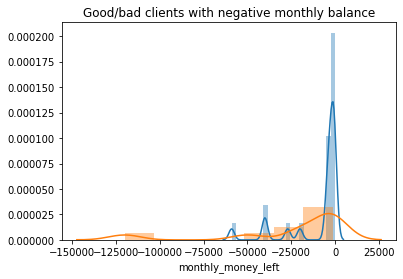

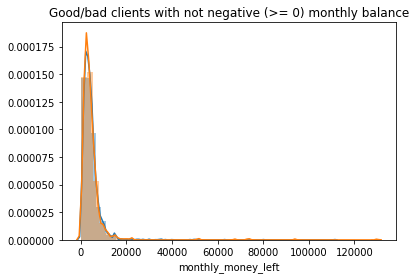

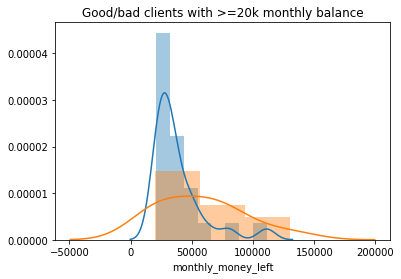

In [35]:
# Money left for each month

# >50k income and becomes a bad client - might indicate a fraud

# Might be a good feature transforming that into % of total income

clients_df['monthly_money_left'] = clients_df['monthlyincome'] - clients_df['monthlycost']

# .describe()
display( clients_df['monthly_money_left'].describe().T )

sns.distplot(
    clients_df[ (clients_df['monthly_money_left'] < 0) & (clients_df['df'] == 'good') ]['monthly_money_left'],
    label='good clients'
)
sns.distplot(
    clients_df[ (clients_df['monthly_money_left'] < 0) & (clients_df['df'] == 'bad') ]['monthly_money_left'],
    label='bad clients'
)
plt.title('Good/bad clients with negative monthly balance')
plt.show()

sns.distplot(
    clients_df[ (clients_df['monthly_money_left'] >= 0) & (clients_df['df'] == 'good') ]['monthly_money_left'],
    label='good clients'
)
sns.distplot(
    clients_df[ (clients_df['monthly_money_left'] >= 0) & (clients_df['df'] == 'bad') ]['monthly_money_left'],
    label='bad clients'
)
plt.title('Good/bad clients with not negative (>= 0) monthly balance')
plt.show()

sns.distplot(
    clients_df[ (clients_df['monthly_money_left'] >= 20000) & (clients_df['df'] == 'good') ]['monthly_money_left'],
    label='good clients'
)
sns.distplot(
    clients_df[ (clients_df['monthly_money_left'] >= 20000) & (clients_df['df'] == 'bad') ]['monthly_money_left'],
    label='bad clients'
)
plt.title('Good/bad clients with >=20k monthly balance')
plt.show()

count      8084.000000
mean       -309.734166
std        5981.356330
min     -124500.000000
25%       -2500.000000
50%       -1000.000000
75%         500.000000
max      140500.000000
Name: 3kuah_50pctrate_income_left, dtype: float64

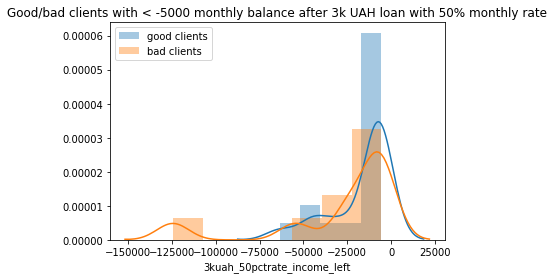

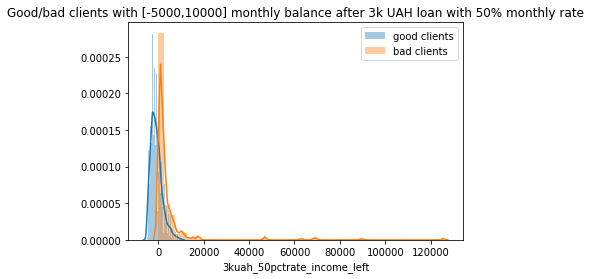

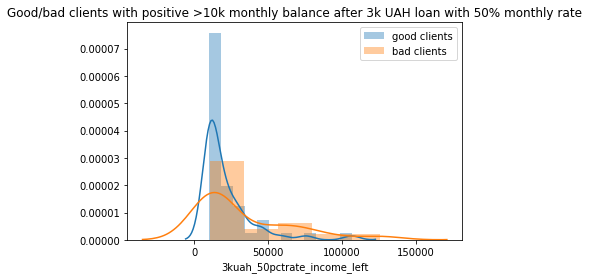

In [36]:
# What is the proportion of clients monthly income left?
# Interest rate - 50%, sum: 3kUAH

loan_amnt = 3000.0
monthly_payout_3k_50pct = loan_amnt * 0.50
endofmonth_topay = loan_amnt + monthly_payout_3k_50pct

clients_df['3kuah_50pctrate_income_left'] = clients_df['monthly_money_left'] - endofmonth_topay

# .describe()
display( clients_df['3kuah_50pctrate_income_left'].describe().T )

# < -5000
sns.distplot(
    clients_df[ (clients_df['3kuah_50pctrate_income_left'] < -5000) & (clients_df['df'] == 'good') ]['3kuah_50pctrate_income_left'],
    label='good clients'
)
sns.distplot(
    clients_df[ (clients_df['3kuah_50pctrate_income_left'] < -5000) & (clients_df['df'] == 'bad') ]['3kuah_50pctrate_income_left'],
    label='bad clients'
)
plt.title('Good/bad clients with < -5000 monthly balance after 3k UAH loan with 50% monthly rate')
plt.legend()
plt.show()

# -5000 - 10000
sns.distplot(
    clients_df[
        (clients_df['3kuah_50pctrate_income_left'] >= -5000) &
        (clients_df['3kuah_50pctrate_income_left'] <= 10000) &
        (clients_df['df'] == 'good')
    ]['3kuah_50pctrate_income_left'],
    label='good clients'
)
sns.distplot(
    clients_df[ (clients_df['3kuah_50pctrate_income_left'] >= 0) & (clients_df['df'] == 'bad') ]['3kuah_50pctrate_income_left'],
    label='bad clients'
)
plt.title('Good/bad clients with [-5000,10000] monthly balance after 3k UAH loan with 50% monthly rate')
plt.legend()
plt.show()

# > 10000
sns.distplot(
    clients_df[ (clients_df['3kuah_50pctrate_income_left'] > 10000) & (clients_df['df'] == 'good') ]['3kuah_50pctrate_income_left'],
    label='good clients'
)
sns.distplot(
    clients_df[ (clients_df['3kuah_50pctrate_income_left'] > 10000) & (clients_df['df'] == 'bad') ]['3kuah_50pctrate_income_left'],
    label='bad clients'
)
plt.title('Good/bad clients with positive >10k monthly balance after 3k UAH loan with 50% monthly rate')
plt.legend()
plt.show()

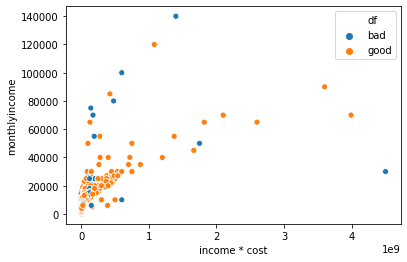

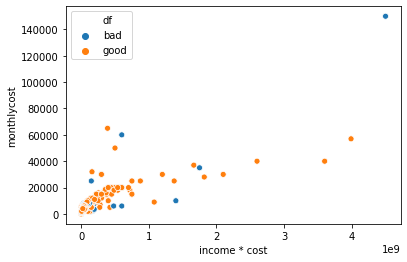

In [37]:
# Interaction: income * cost

sns.scatterplot(
    clients_df['monthlyincome'] * clients_df['monthlycost'],
    clients_df['monthlyincome'],
    hue=clients_df['df']
)
plt.xlabel('income * cost')
plt.show()

sns.scatterplot(
    clients_df['monthlyincome'] * clients_df['monthlycost'],
    clients_df['monthlycost'],
    hue=clients_df['df']
)
plt.xlabel('income * cost')
plt.show()